Using newest file: /mnt/c/Users/MacIver/Research/BotEvade/CellworldServer/main/cpp/robot_controller/logs/lostest_10092024_164138.json
Episode count: 2
Steps: 1648
Steps: 1050

Total steps in experiment: 2698


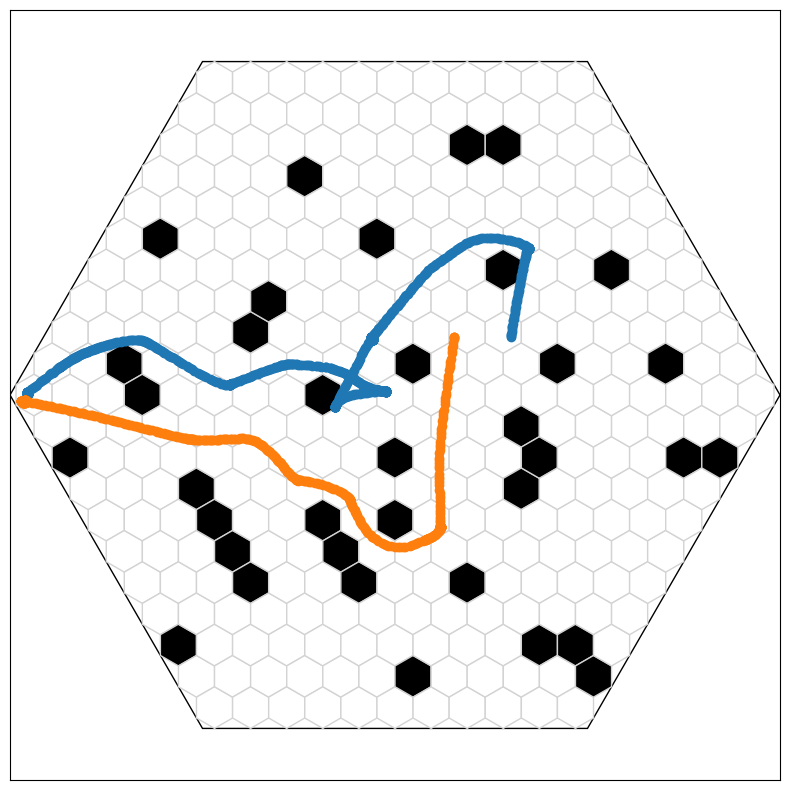

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import cellworld as cw
from cellworld import *

def plot_experiment(exp_path:str=None):
  if exp_path is None: 
    print("No file passed")
    return 
  
  e = Experiment.load_from_file(exp_path)
  if e is None: 
    print("No experiment found: e is NONE")
    return 
  w = World.get_from_parameters_names('hexagonal',"canonical",e.occlusions)
  d = Display(w, fig_size=(8,8), padding=0, cell_edge_color="lightgrey", background_color="white", habitat_edge_color="black")
  subject_str = 'prey'
  scalar = 1.0
  mv = 1.0
  total_steps = 0
  print(f'Episode count: {len(e.episodes)}')
  for _, episode in enumerate(e.episodes[:]):
    t = episode.trajectories
    rt = t.get_agent_trajectory('prey')
    rpred = t.get_agent_trajectory('predator')
   
    timestamps = t.get('time_stamp')
    n_steps = len(timestamps)
    total_steps += n_steps
    print(f'Steps: {n_steps}')
    
    # d.add_trajectories(rt)
    # d.add_trajectories(rpred)
    d.ax.plot(rt.get('location').get('x'),rt.get('location').get('y'),'--o')
    frame_list = rt.get('frame')
    nv = [f/(max(frame_list)) for f in frame_list]
    # d.add_trajectories(rt, colors = {'prey':[plt.cm.jet(v) for v in nv]}, alphas = {'prey':0.7})
    d.add_trajectories(rt, colors = {'prey':'r'}, alphas = {'prey':0.7})

  print(f"\nTotal steps in experiment: {total_steps}")
def plot_episode(episode_path:str=None):
  if episode_path is None: 
    print("No file passed")
    return

  w = World.get_from_parameters_names('hexagonal',"canonical",'21_05')
  d = Display(w, fig_size=(6,6), padding=0, cell_edge_color="lightgrey", background_color="white", habitat_edge_color="black")
  scalar = 1.0
  mv = 1.0
  # d.ax.set_xlim([0,1])
  # d.ax.set_ylim([-.5,1])
  episode = Episode.load_from_file(episode_path)
  t = episode.trajectories
  agent_t = t.split_by_agent()
  m1_t = agent_t['prey']
  d.ax.plot(m1_t.get('location').get('x'),[y for y in m1_t.get('location').get('y')])
  # d.add_trajectories(t, colors = {'prey': 'darkorange'},
  #                   alphas = {'prey': 1.0}, zorder = 5)

  cw.Cell_group_builder.get_from_name("hexagonal", "20_05", "occlusions")
  
def plot_experiment_episode_index(exp_path:str=None,idx:int=0):
  if exp_path is None: 
    print("No file passed")
    return 
  
  e = Experiment.load_from_file(exp_path)
  
  if e is None: 
    print("No experiment found: e is NONE")
    return 
  w = World.get_from_parameters_names('hexagonal',"canonical",e.occlusions)
  d = Display(w, fig_size=(6,6), padding=0, cell_edge_color="lightgrey", background_color="white", habitat_edge_color="black")
  subject_str = 'prey'
  scalar = 1.0
  mv = 1.0

  fig = plt.figure(figsize=(4,3))
    
  episode = e.episodes[idx]
  t = episode.trajectories
  rt = t.get_agent_trajectory('prey')
  rpred = t.get_agent_trajectory('predator')
  # rt = rt.get_unique_steps().copy()
  rpred = t.get_agent_trajectory('predator')
  # timestamps = t.get('time_stamp')
  # print(f'Total duration: {timestamps[-1]} | frames: {len(rt)}')

  frame_list = rt.get('frame')
  vr = rt.get('data')
  d.add_trajectories(rt, colors = {'prey':'r'}, alphas = {'prey':0.7})
  d.add_trajectories(rpred, colors={'predator':'b'})
  d.ax.set_xlim([-0.1, 1.1])

import os
import glob

def get_newest_file_in_folder(folder_path, extension="*"):
    # Handle the case where the extension is empty or "*"
    if extension == "*":
        search_pattern = os.path.join(folder_path, "*")
    else:
        search_pattern = os.path.join(folder_path, f"*.{extension}")
    
    # Get a list of all files in the folder with the specified extension and full path
    files = glob.glob(search_pattern)
    
    # Check if the folder is empty or no files with the given extension are found
    if not files:
        return None
    
    # Get the newest file based on the creation/modification time
    newest_file = max(files, key=os.path.getmtime)
    
    return newest_file

folder_path = "/mnt/c/Users/MacIver/Research/BotEvade/CellworldServer/main/cpp/robot_controller/logs"  # Replace with the path to your folder
extension = "json"  # Replace with the desired file extension (e.g., 'txt', 'jpg', 'py')
newest_file = get_newest_file_in_folder(folder_path, extension)
if newest_file: 
  file = newest_file
  print(f"Using newest file: {file}")
else:
  file = '/mnt/c/Users/MacIver/Research/BotEvade/CellworldServer/main/cpp/robot_controller/logs/labtest_08212024_133529.json'
  print(f"Using hard-coded path: {file}")
# plot_experiment_episode_index(file, 0)
plot_experiment(file)
# plot_experiment("/mnt/c/Users/MacIver/Research/BotEvade/CellworldServer/main/cpp/robot_controller/logs/crown_alex_maldo_10042024_101014.json")

In [4]:
## show summary info of trajectories 
# show time steps 

def detect_outliers(array):
    import numpy as np 
    mean = np.mean(array)
    std = np.std(array)
    lower_bound = mean - std
    upper_bound = mean + std
    outliers = array[(array < lower_bound) | (array > upper_bound)]
    
    if len(outliers) > 0:
        return f"Outliers detected: {outliers}"
    else:
        return "No outliers detected"
    
def show_info(filepath:str=None):
    import numpy as np
    if not filepath: print("need a filepath"); return

    e = Experiment.load_from_file(filepath)
    if e is None: 
        print("No experiment found: e is NONE")
        return 
    
    w = World.get_from_parameters_names('hexagonal',"canonical",e.occlusions)
    subject_str = 'prey'
    scalar = 1.0
    mv = 1.0
    print(f'Episode count: {len(e.episodes)}')
    grads = []
    for i, episode in enumerate(e.episodes[:]):
        t = episode.trajectories
        tprey = t.get_agent_trajectory('prey')
        tpred = t.get_agent_trajectory('predator')
        
        frame_list = tprey.get('frame')
        nv = [f/(max(frame_list)) for f in frame_list]
        grad = np.gradient(nv)
        grads.append(grad)

    return grads
    
g = show_info(file)

Episode count: 5


Episode count: 1


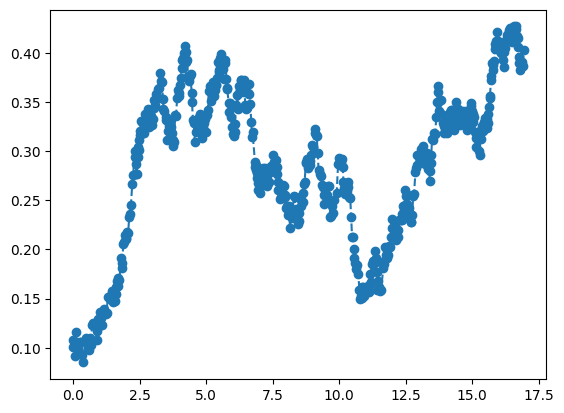

In [46]:
# file = '/mnt/c/Users/MacIver/Research/BotEvade/CellworldServer/main/cpp/robot_controller/logs/labtest_08202024_164619.json'
e = Experiment.load_from_file(file)
w = World.get_from_parameters_names('hexagonal',"canonical",e.occlusions)
subject_str = 'prey'
scalar = 1.0
mv = 1.0
print(f'Episode count: {len(e.episodes)}')
import numpy as np 
gp = []
gpp = []
for i, episode in enumerate(e.episodes[:]):
    t = episode.trajectories
    tprey = t.get_agent_trajectory('prey')
    frame_list = tprey.get('frame')
    gpp.append(tprey.get_locations())
    
xt = tprey.get('location').get('x')
tjson = tprey.get('time_stamp')
t = np.array(list(tjson)) - tjson[0]
plt.plot(t,xt,'--o')
# gpp = np.gradient(np.gradient(xt))
# print(gpp)
# print(np.where(np.nonzero(gpp)))
# xt = tprey.get_locations().get('prey').get('y')

In [192]:
np.array(list(t)) - t[0]

array([0.00000000e+00, 1.66666667e-02, 3.33333333e-02, ...,
       2.48666667e+01, 2.48833333e+01, 2.49000000e+01])

In [119]:
df = tprey.to_dataframe()
df.time_stamp

0       355.200000
1       355.233333
2       355.266667
3       355.300000
4       355.333333
           ...    
2016    422.400000
2017    422.433333
2018    422.466667
2019    422.500000
2020    422.533333
Name: time_stamp, Length: 2021, dtype: float64

In [51]:
import numpy as np
fs = 1/g[0][0]
print(fs)
np.where(np.nonzero(np.gradient(g[0])))[1]

9394.0
